In [2]:
import pandas as pd
import networkx as nx
file_path1 = "/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/"

graph_10 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_course_901.csv", sep = '\t')
graph_20 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_course_902.csv", sep = '\t')
graph_30 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_course_903.csv", sep = '\t')
graph_40 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_course_904.csv", sep = '\t')
graph_50 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_course_905.csv", sep = '\t')
graph_60 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_course_906.csv", sep = '\t')
graph_70 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_course_907.csv", sep = '\t')
graph_80 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_course_908.csv", sep = '\t')
graph_90 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_course_909.csv", sep = '\t')
# graph_100 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_course.csv", sep = '\t')
# graph_100_shuffled_reaction = pd.read_csv(file_path1 + "sorted_by_ig1030_shuffled_reaction_time_course_2.csv", sep = '\t')

In [4]:
import pandas as pd
import networkx as nx

def analyze_and_save_graph(graph_data, graph_name, output_folder):
    top_1_percent = lambda df: df.head(max(1, len(df)//100))
    top_100 = lambda df: df.head(100)

    def top_25_percent_sum(df):
        total_sum = df["ig_1"].sum()
        threshold = total_sum * 0.25
        df["ig_1"] = df["ig_1"].cumsum()
        return df[df["ig_1"] <= threshold]

    def get_top(df, percentage):
        if percentage == 0.01:
            return top_1_percent(df)
        elif percentage == 0.25:
            return top_25_percent_sum(df)
        elif percentage == 1.00:
            return top_100(df)

    # 计算中心性并保存结果
    def calculate_and_save_centrality(G, mode, output_folder, graph_name, centrality_type):
        if centrality_type == 'Eigenvector':
            centrality = nx.eigenvector_centrality(G, max_iter=1000)
        elif centrality_type == 'Betweenness':
            centrality = nx.betweenness_centrality(G)
        elif centrality_type == 'Closeness':
            centrality = nx.closeness_centrality(G)
        
        df_centrality = pd.DataFrame({
            'Node': G.nodes(),
            centrality_type: [centrality[node] for node in G.nodes()]
        })

        df_centrality.to_csv(f"{output_folder}/90%dataset_{graph_name}_{mode}_{centrality_type}.csv", index=False)

    # 筛选并处理图
    for mode, percentage in [('Top_1%', 0.01), ('Top_25%', 0.25), ('Top_100', 1.00)]:
        filtered_data = get_top(graph_data, percentage)
        G = nx.from_pandas_edgelist(filtered_data, 'start', 'end', create_using=nx.DiGraph())

        for centrality_type in ['Eigenvector', 'Betweenness', 'Closeness']:
            calculate_and_save_centrality(G, mode, output_folder, graph_name, centrality_type)

# 示例用的图数据，每个图的 DataFrame
graphs = [graph_10, graph_20, graph_30, graph_40, graph_50, graph_60, graph_70, graph_80, graph_90]
graph_names = ['graph_10', 'graph_20', 'graph_30', 'graph_40', 'graph_50', 'graph_60', 'graph_70', 'graph_80', 'graph_90']
output_folder = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/centrality/'

for graph, name in zip(graphs, graph_names):
    print(f'Analyzing and saving {name}')
    analyze_and_save_graph(graph, name, output_folder)


Analyzing and saving graph_10
Analyzing and saving graph_20
Analyzing and saving graph_30
Analyzing and saving graph_40
Analyzing and saving graph_50
Analyzing and saving graph_60
Analyzing and saving graph_70
Analyzing and saving graph_80
Analyzing and saving graph_90


In [12]:
pip install matplotlib_venn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45286 sha256=b966580401c34a3861b8a2ed24f7e888aa5bf1cb0b7bb047639e7cffb55514dc
  Stored in directory: /mnt/ufs18/home-006/yuankeji/.cache/pip/wheels/08/28/f0/0a3240d632a27df6da04d2888a6b058c37e1cbbb425ec5d2cc
Successfully built matplotlib_venn
Note: you may need to restart the kernel to use updated packages.


First 10 rows of graph_10:
            Node   Eigenvector
0  R-MMU-8956140  1.129816e-06
1  R-MMU-8956184  5.659917e-06
2  R-MMU-5686685  1.402706e-08
3  R-MMU-5693599  1.479217e-07
4  R-MMU-1981128  4.472136e-01
5  R-MMU-8948222  2.763932e-01
6  R-MMU-5683801  6.375934e-10
7  R-MMU-6799332  1.479217e-07
8  R-MMU-6805285  9.959209e-07
9  R-MMU-1981120  6.375934e-10
First 10 rows of graph_20:
            Node   Eigenvector
0  R-MMU-8956140  6.724939e-09
1  R-MMU-8956184  1.344988e-07
2  R-MMU-2993780  8.506508e-01
3  R-MMU-1169404  7.733680e-07
4  R-MMU-1169403  7.034286e-06
5  R-MMU-2990833  5.257311e-01
6  R-MMU-2029268  6.724939e-09
7  R-MMU-2029272  1.344988e-07
8  R-MMU-5668481  1.284463e-06
9  R-MMU-5684887  1.344988e-07
First 10 rows of graph_30:
            Node   Eigenvector
0  R-MMU-2993780  8.506508e-01
1  R-MMU-2990833  5.257311e-01
2  R-MMU-8956140  3.614591e-15
3  R-MMU-8956184  1.265107e-13
4  R-MMU-1981120  3.614591e-15
5  R-MMU-8948231  1.265107e-13
6  R-MMU-5686685  1.

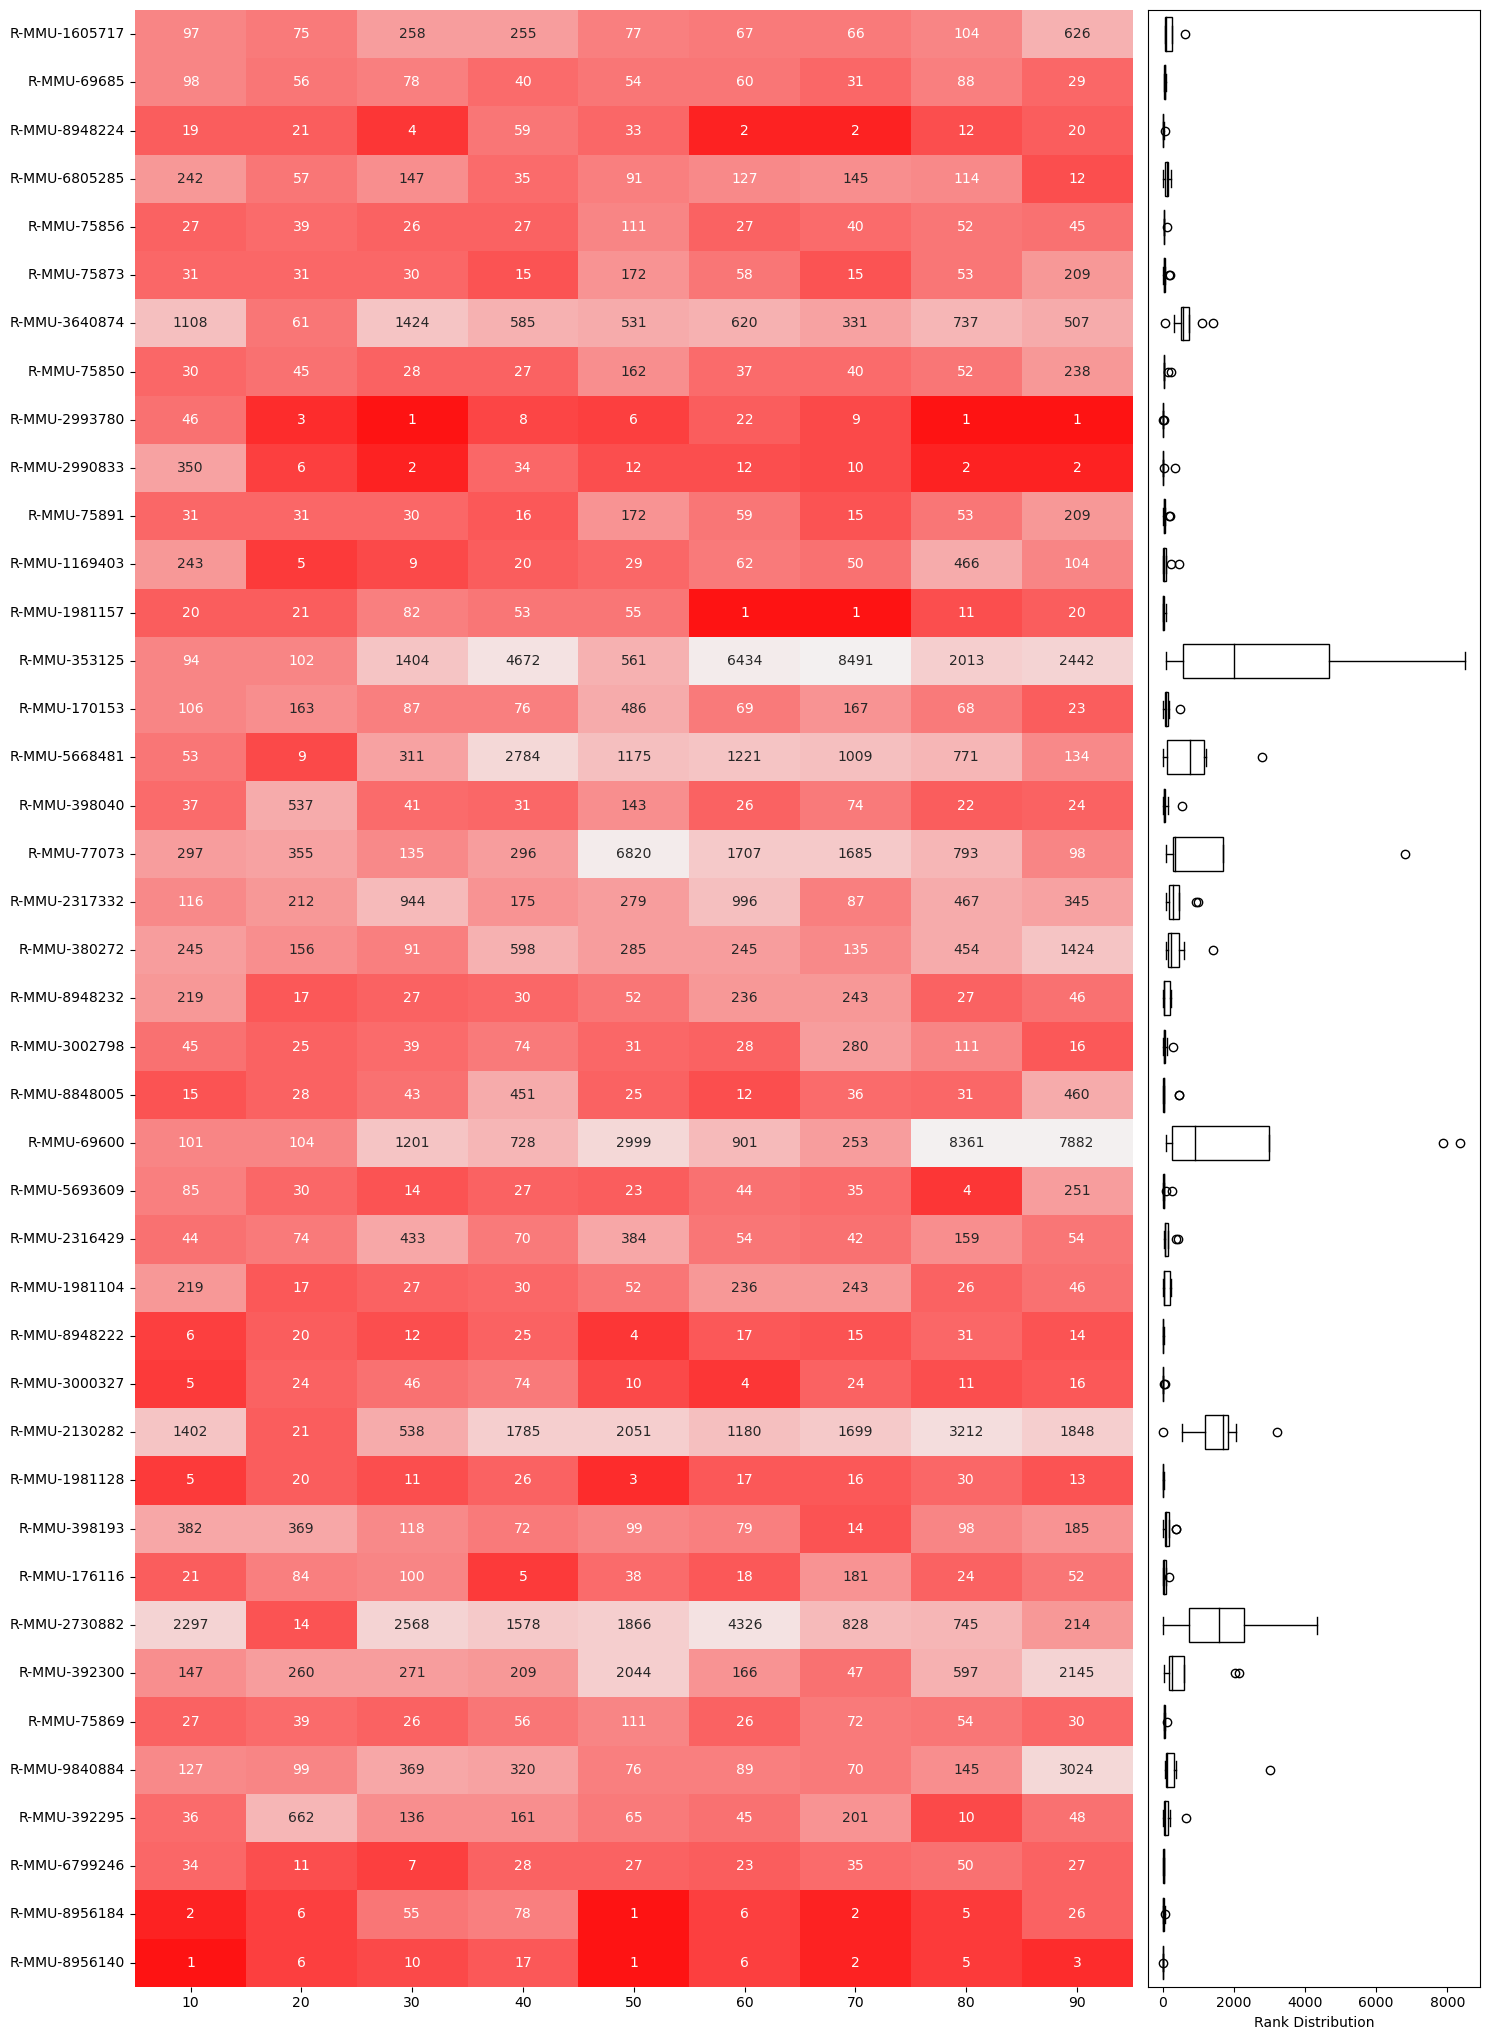

First 10 rows of graph_10:
            Node  Betweenness
0  R-MMU-8956140     0.001411
1  R-MMU-8956184     0.001323
2  R-MMU-5686685     0.000088
3  R-MMU-5693599     0.000000
4  R-MMU-1981128     0.000441
5  R-MMU-8948222     0.000000
6  R-MMU-5683801     0.000000
7  R-MMU-6799332     0.000353
8  R-MMU-6805285     0.000000
9  R-MMU-1981120     0.000000
First 10 rows of graph_20:
            Node  Betweenness
0  R-MMU-8956140      0.00000
1  R-MMU-8956184      0.00063
2  R-MMU-2993780      0.00000
3  R-MMU-1169404      0.00042
4  R-MMU-1169403      0.00000
5  R-MMU-2990833      0.00007
6  R-MMU-2029268      0.00000
7  R-MMU-2029272      0.00000
8  R-MMU-5668481      0.00000
9  R-MMU-5684887      0.00007
First 10 rows of graph_30:
            Node  Betweenness
0  R-MMU-2993780     0.000000
1  R-MMU-2990833     0.000092
2  R-MMU-8956140     0.000000
3  R-MMU-8956184     0.000183
4  R-MMU-1981120     0.000000
5  R-MMU-8948231     0.000000
6  R-MMU-5686685     0.000183
7  R-MMU-5693599   

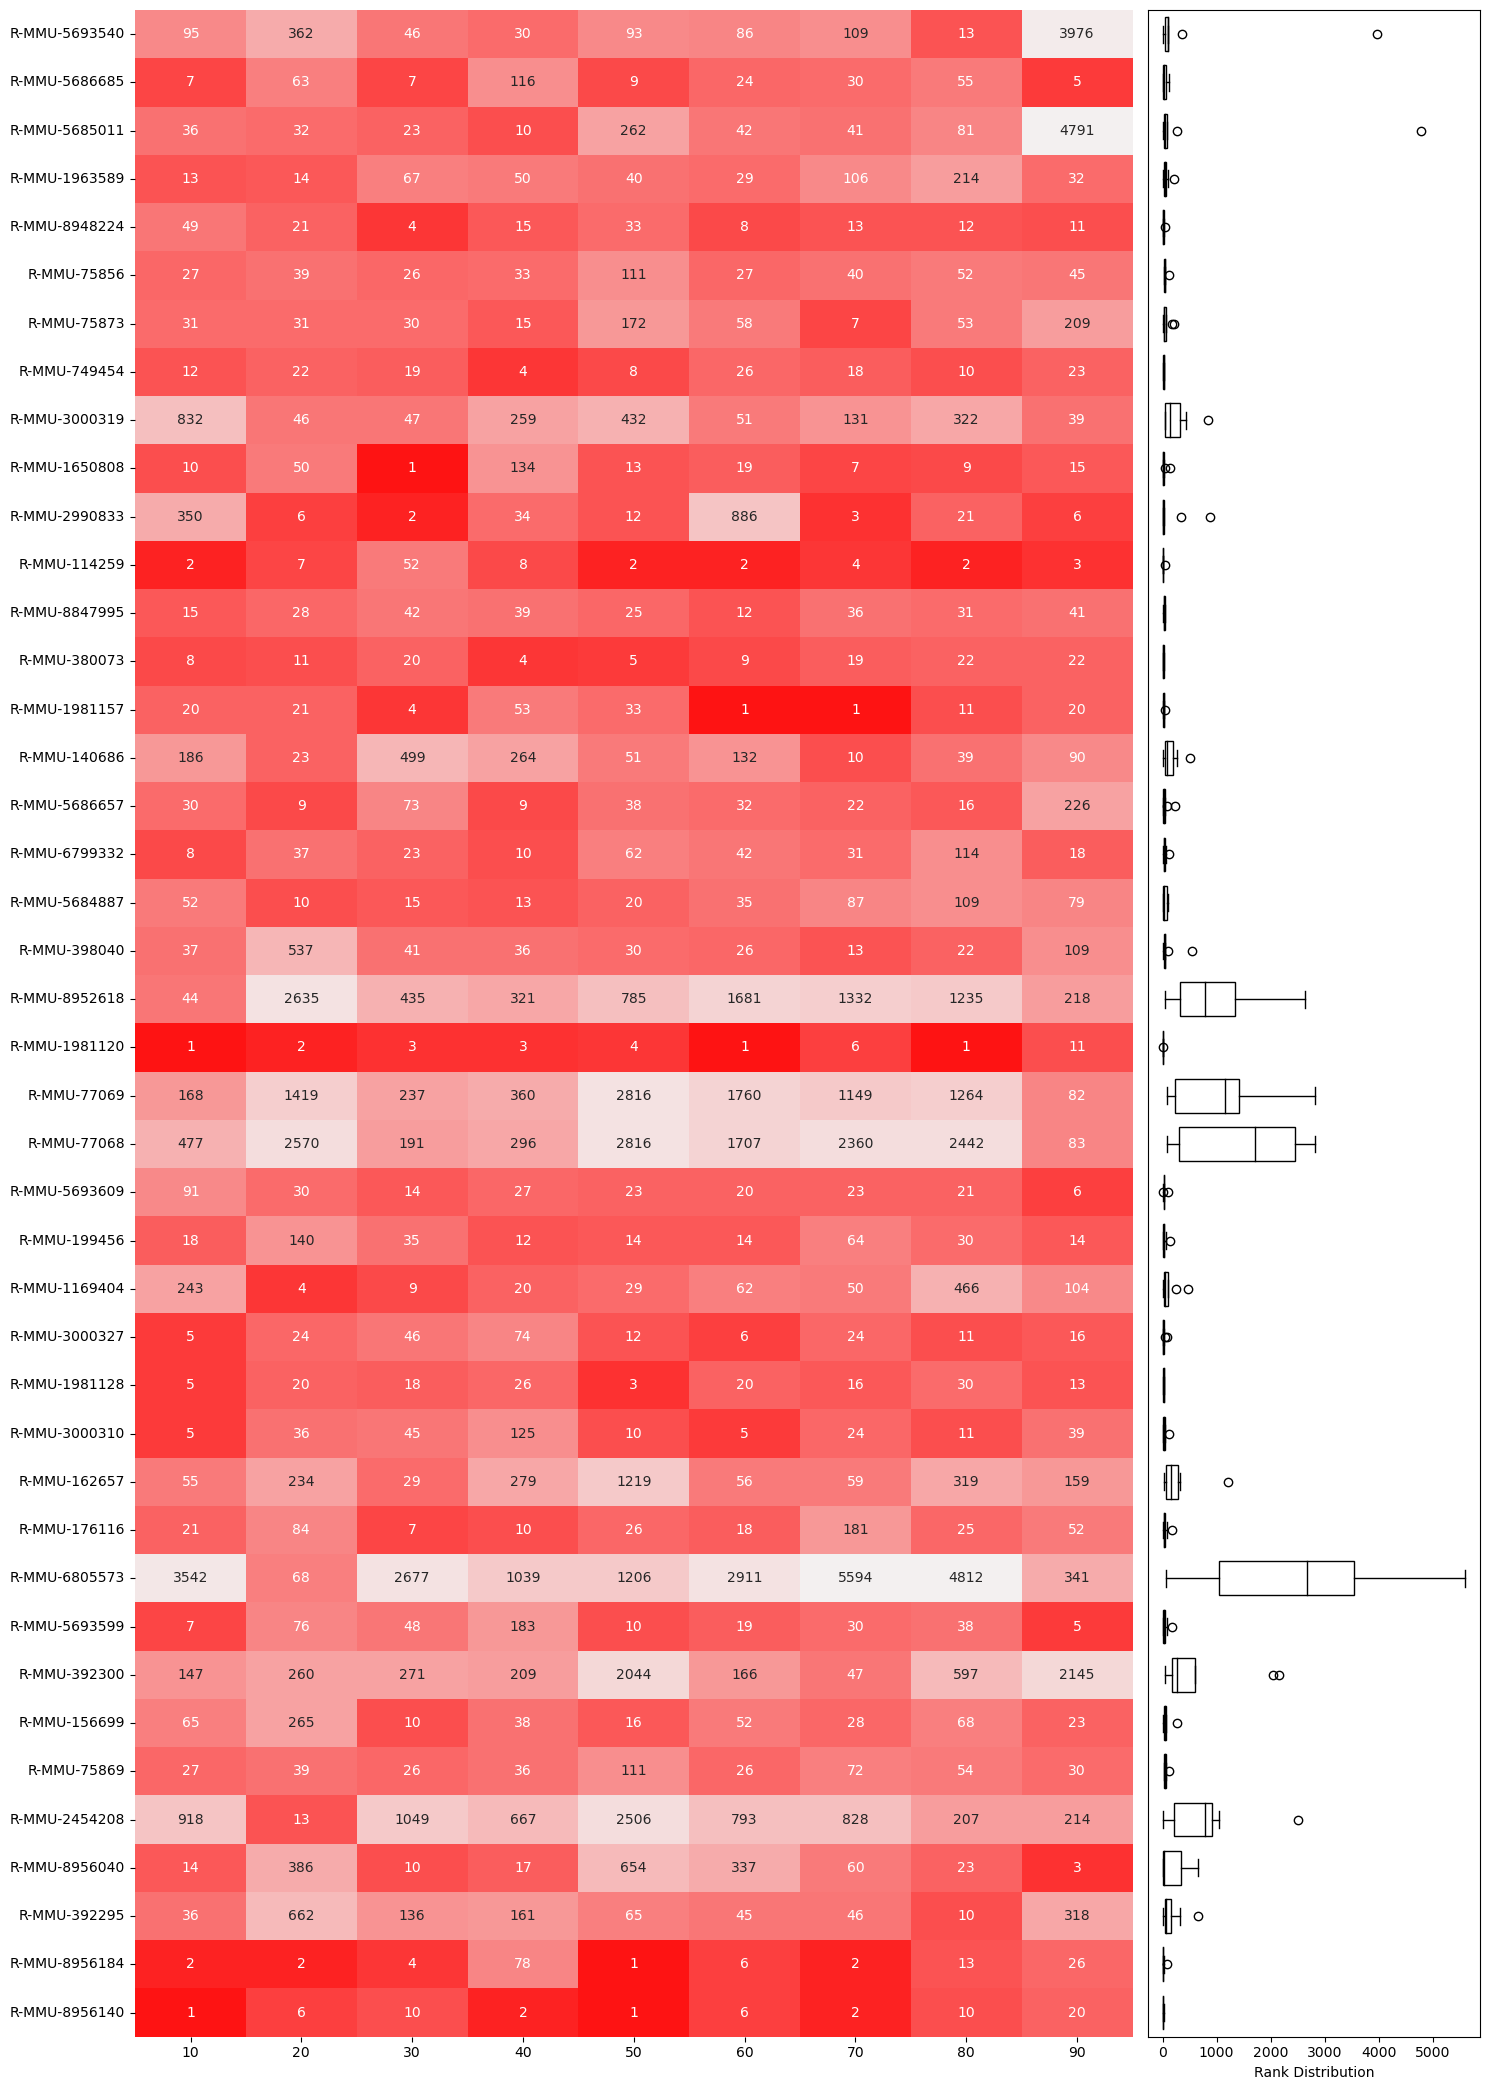

First 10 rows of graph_10:
            Node  Closeness
0  R-MMU-8956140   0.018692
1  R-MMU-8956184   0.017973
2  R-MMU-5686685   0.009346
3  R-MMU-5693599   0.012461
4  R-MMU-1981128   0.029907
5  R-MMU-8948222   0.018692
6  R-MMU-5683801   0.000000
7  R-MMU-6799332   0.012461
8  R-MMU-6805285   0.014019
9  R-MMU-1981120   0.000000
First 10 rows of graph_20:
            Node  Closeness
0  R-MMU-8956140   0.000000
1  R-MMU-8956184   0.008333
2  R-MMU-2993780   0.011111
3  R-MMU-1169404   0.050000
4  R-MMU-1169403   0.031410
5  R-MMU-2990833   0.016667
6  R-MMU-2029268   0.000000
7  R-MMU-2029272   0.008333
8  R-MMU-5668481   0.011111
9  R-MMU-5684887   0.008333
First 10 rows of graph_30:
            Node  Closeness
0  R-MMU-2993780   0.012698
1  R-MMU-2990833   0.019048
2  R-MMU-8956140   0.000000
3  R-MMU-8956184   0.009524
4  R-MMU-1981120   0.000000
5  R-MMU-8948231   0.009524
6  R-MMU-5686685   0.009524
7  R-MMU-5693599   0.012698
8  R-MMU-4088134   0.000000
9   R-MMU-156699   0.01

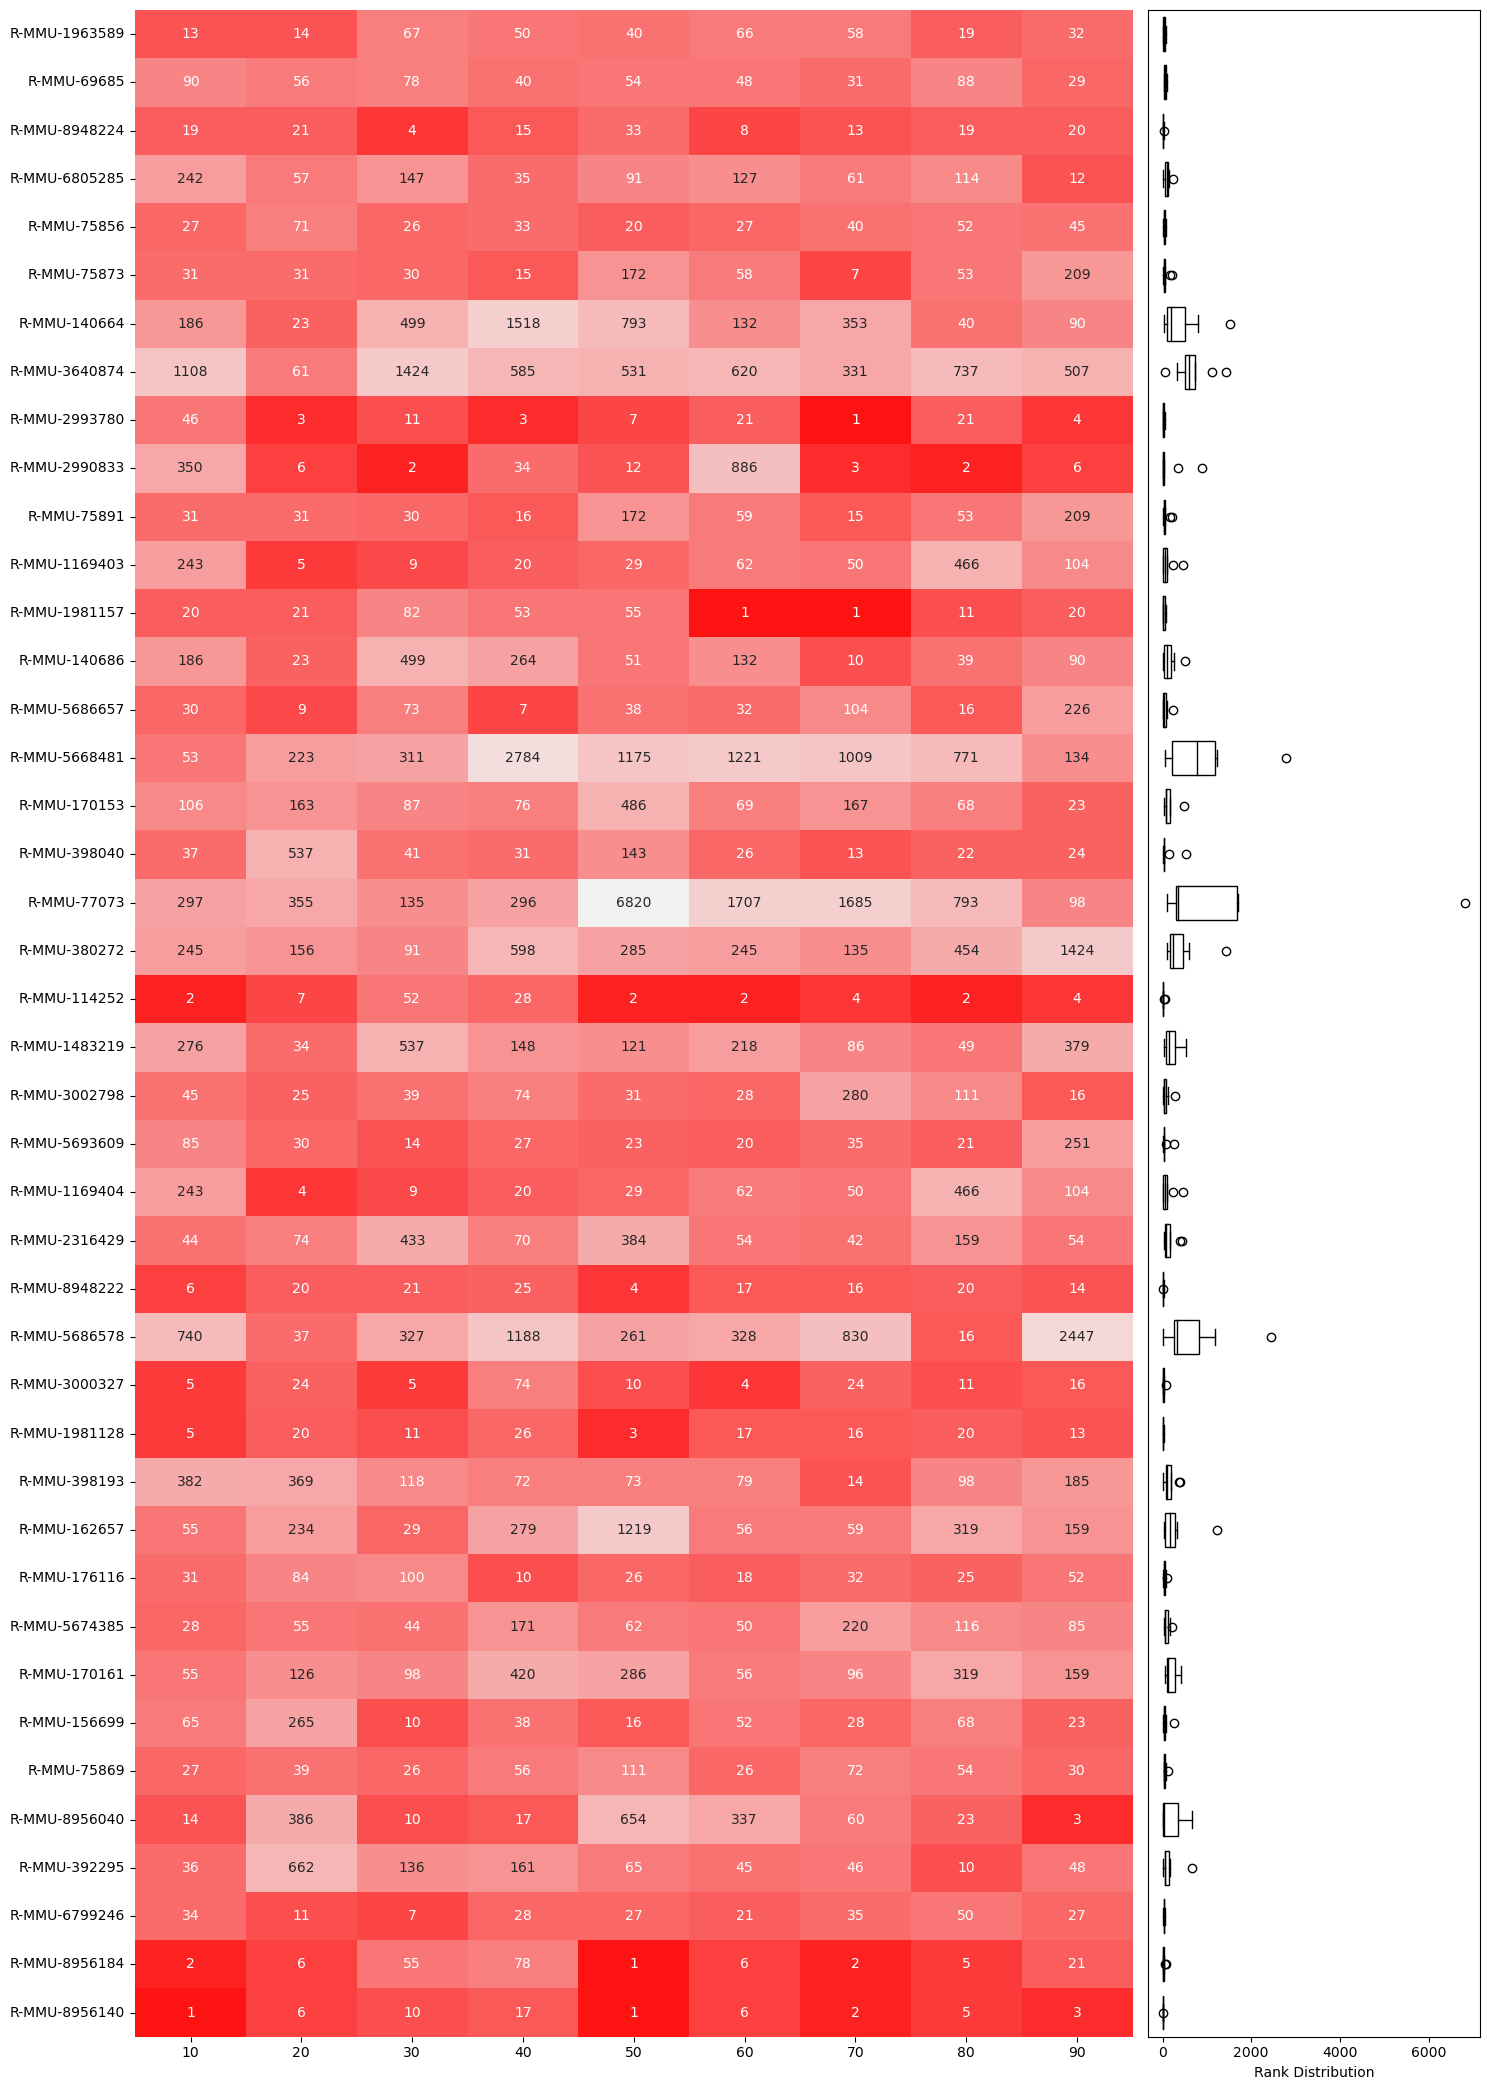

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

def get_top_10_reactions(df, centrality_type):
    return df.nlargest(10, centrality_type)[['Node', centrality_type]]

def analyze_reaction_overlap(folder_path, centrality_type, mode):
    datasets = ['graph_10', 'graph_20', 'graph_30', 'graph_40', 'graph_50', 
               'graph_60', 'graph_70', 'graph_80', 'graph_90']
    
    all_top_reactions = {}
    all_data = {
        'graph_10': graph_10,
        'graph_20': graph_20,
        'graph_30': graph_30,
        'graph_40': graph_40,
        'graph_50': graph_50,
        'graph_60': graph_60,
        'graph_70': graph_70,
        'graph_80': graph_80,
        'graph_90': graph_90
    }
    
    for dataset in datasets:
        file_path = f"{folder_path}/{dataset}_{mode}_{centrality_type}.csv"
        df = pd.read_csv(file_path, sep=",")
        print(f"First 10 rows of {dataset}:")
        print(df.head(10))
        all_top_reactions[dataset] = get_top_10_reactions(df, centrality_type)
    
    unique_reactions = set()
    for df in all_top_reactions.values():
        unique_reactions.update(df['Node'].values)
    
    result_matrix = []
    for reaction in unique_reactions:
        row = []
        for dataset in datasets:
            if reaction in all_top_reactions[dataset]['Node'].values:
                rank = all_top_reactions[dataset][all_top_reactions[dataset]['Node'] == reaction].index[0] + 1
                row.append(rank)
            else:
                original_df = all_data[dataset]
                mask = (original_df['start'] == reaction) | (original_df['end'] == reaction)
                if mask.any():  
                    index = original_df[mask].index[0] + 1
                else:
                    index = -1  
                row.append(index)
        result_matrix.append(row)
    
    result_df = pd.DataFrame(result_matrix, 
                           index=list(unique_reactions), 
                           columns=[d.replace('graph_', '') for d in datasets])
    
    fig = plt.figure(figsize=(15, len(unique_reactions)*0.5))
    
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    ax_heat = plt.subplot(gs[0])
    result_df_display = result_df.copy()
    result_df_display = result_df_display.where(result_df_display <= 0, lambda x: np.log(x))
    max_val = result_df_display.max().max()
    
    colors = ['#FFFFFF']
    colors.extend(sns.light_palette("red", n_colors=50, as_cmap=False).as_hex()[::-1])
    
    sns.heatmap(result_df_display,
                cmap=colors,
                center=None,
                vmin=-1,
                vmax=max_val,
                annot=result_df,
                fmt='.0f',
                cbar=False,  
                yticklabels=True,
                annot_kws={'size': 10},
                ax=ax_heat)
    
    ax_box = plt.subplot(gs[1])
    positions = np.arange(len(result_df.index)) + 0.5 
    
    for i, (idx, row) in enumerate(result_df.iterrows()):
        valid_values = row[row != -1]
        if not valid_values.empty:
            bp = ax_box.boxplot(valid_values, 
                              positions=[positions[i]], 
                              vert=False,  
                              widths=0.7,
                              patch_artist=True,  
                              medianprops=dict(color="black"),  
                              boxprops=dict(facecolor="white", color="black"), 
                              whiskerprops=dict(color="black"), 
                              capprops=dict(color="black"))  
    
    ax_box.set_ylim(len(result_df.index), 0)  
    ax_box.set_yticks([])  
    ax_box.set_xlabel('Rank Distribution')
    
    plt.tight_layout()
    plt.show()

folder_path = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/centrality/'
for centrality_type in ['Eigenvector', 'Betweenness', 'Closeness']:
    for mode in ['Top_1%']:
        analyze_reaction_overlap(folder_path, centrality_type, mode)